## *k*-NN in scikit-learn using correlation

In [18]:
import pandas as pd
import numpy as np

#from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors

In [19]:
cols = ['Ex','X0','X1','X2','X3','X4','X5','X6','X7','X8','X9']
#ind =['A', 'B', 'Q']
cd = [['A',3,4,5,5,4,3,2,3,4,3],
      ['B',9,9,8,8,9,10,10,9,8,9],
      ['Q',8,8,9,9,8,7,7,8,9,8]]
corr = pd.DataFrame(cd, columns = cols)
corr = corr.set_index('Ex')
corr

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9
Ex,,,,,,,,,,
A,3,4,5,5,4,3,2,3,4,3
B,9,9,8,8,9,10,10,9,8,9
Q,8,8,9,9,8,7,7,8,9,8


Text(0.5, 9.2, 'B')

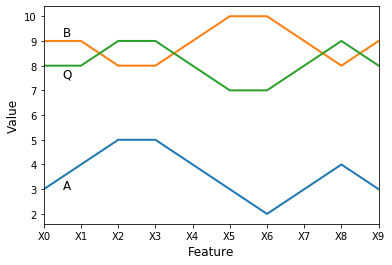

In [20]:
%matplotlib inline
pl = corr.T.plot(linewidth=2,legend = False)
pl.set_xlabel('Feature',fontsize = 12)
pl.set_ylabel('Value',fontsize = 12)
pl.text(0.5,3, 'A', fontsize=12)
pl.text(0.5,7.5, 'Q', fontsize=12)
pl.text(0.5,9.2, 'B', fontsize=12)

In [21]:
X = corr.values
X

array([[ 3,  4,  5,  5,  4,  3,  2,  3,  4,  3],
       [ 9,  9,  8,  8,  9, 10, 10,  9,  8,  9],
       [ 8,  8,  9,  9,  8,  7,  7,  8,  9,  8]])

In [22]:
q = X[2]
X = X[:2]
X

array([[ 3,  4,  5,  5,  4,  3,  2,  3,  4,  3],
       [ 9,  9,  8,  8,  9, 10, 10,  9,  8,  9]])

Set up two Nearest Neighbour objects, one for Euclidean and one for correlation.  
*These are not classifiers.*

In [ ]:
NN = NearestNeighbors(metric='euclidean')
eNN = NN.fit(X) 
NN = NearestNeighbors(metric='correlation')
corrNN = NN.fit(X) 

In [8]:
e_nn = eNN.kneighbors([q], 1)
print('Nearest Neighbour by Euclidean dist. is', corr.index[e_nn[1][0][0]])
c_nn = corrNN.kneighbors([q], 1)
print('Nearest Neighbour by correlation is', corr.index[c_nn[1][0][0]])

Nearest Neighbour by Euclidean dist. is B
Nearest Neighbour by correlation is A


### How is correlation used?
1 - correlation(q,x) is used as the distance measure

In [10]:
# The Euclidean distances:
eNN.kneighbors([q], 2)

(array([[ 5.09901951, 14.31782106]]), array([[1, 0]]))

In [11]:
# The correlation distances:
corrNN.kneighbors([q], 2)

(array([[0.15830242, 2.        ]]), array([[0, 1]]))

numpy has function for calculating correlation

In [12]:
rq0 = np.corrcoef(q, X[0])
print(rq0)

[[1.         0.84169758]
 [0.84169758 1.        ]]


In [24]:
rq1 = np.corrcoef(q, X[1])
print(rq1)

[[ 1. -1.]
 [-1.  1.]]


In [25]:
1-rq0[0,1]

0.1583024233754582

In [26]:
1-rq1[0,1]

2.0

Cosine

In [ ]:
import matplotlib.lines as mlines
#cosi = pd.read_csv('Cosine.csv',index_col = 'Ex')

In [ ]:
cosi = pd.DataFrame(
    [['C',1.0,2.0],
     ['D',4.5,2.5],
     ['Q',2.0,1.5]],
    columns=['Ex','X1','X2'])

cosi = cosi.set_index('Ex')
cosi

In [ ]:
from sklearn.preprocessing import Normalizer
cosi.iloc[:,:] = Normalizer(norm='l2').fit_transform(cosi)
cosi

In [ ]:
pl = cosi.plot.scatter('X1','X2',figsize=(5,3))
pl.set_xlim(0,5)
pl.set_ylim(0,3)
c1, c2 = [0,1], [0,2]
d1, d2 = [0,4.5], [0,2.5]
q1, q2 = [0,2], [0,1.5]
pl.plot(c1,c2,d1,d2,q1,q2, marker = 'o', markersize = 10,linewidth = 2)
pl.text(1.2,2, 'C', fontsize=12)
pl.text(4.7,2.3, 'D', fontsize=12)
pl.text(2.2,1.5, 'Q', fontsize=12)

In [ ]:
from scipy import spatial

In [ ]:
c0 = spatial.distance.cosine(q, X[0])
c1 = spatial.distance.cosine(q, X[1])
print(c0,c1)

In [ ]:
NN = NearestNeighbors(metric='cosine')
cosNN = NN.fit(X) 

In [ ]:
cosNN.kneighbors([q], 2)